In [6]:
!python -W ignore run_experiments.py  --dataset_path ../../dataset --method "baseline" --out_path './results'

baseline
low_traffic
{'scenario': 'low_traffic', 'split': 'train', 'topk': 1, 'metric': 'latency', 'issue': 0, 'ground_truth': 'PetSearch_AWS::ECS::Fargate', 'intopk': False, 'empty': False}
{'scenario': 'low_traffic', 'split': 'train', 'topk': 3, 'metric': 'latency', 'issue': 0, 'ground_truth': 'PetSearch_AWS::ECS::Fargate', 'intopk': False, 'empty': False}
{'scenario': 'low_traffic', 'split': 'train', 'topk': 1, 'metric': 'latency', 'issue': 1, 'ground_truth': 'PetSearch_AWS::ECS::Fargate', 'intopk': False, 'empty': True}
{'scenario': 'low_traffic', 'split': 'train', 'topk': 3, 'metric': 'latency', 'issue': 1, 'ground_truth': 'PetSearch_AWS::ECS::Fargate', 'intopk': False, 'empty': True}
{'scenario': 'low_traffic', 'split': 'train', 'topk': 1, 'metric': 'latency', 'issue': 2, 'ground_truth': 'PetSearch_AWS::ECS::Fargate', 'intopk': True, 'empty': False}
{'scenario': 'low_traffic', 'split': 'train', 'topk': 3, 'metric': 'latency', 'issue': 2, 'ground_truth': 'PetSearch_AWS::ECS::Farga

## Actual Graph of the system

In [1]:
dataset_path = '../../dataset/high_traffic/graph.csv'

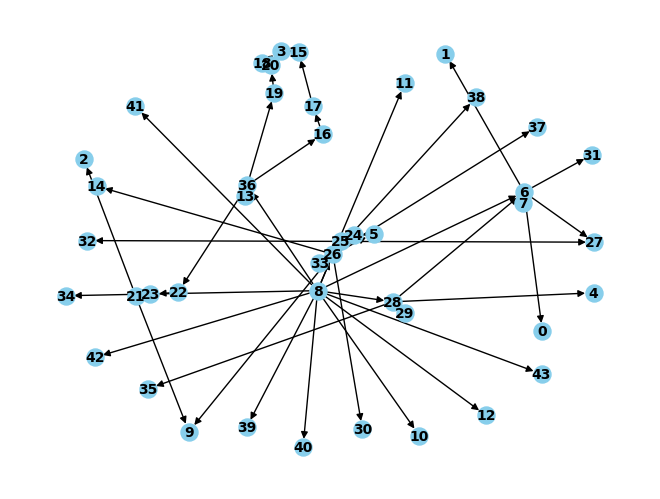

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv(dataset_path, index_col=0)

# Create a mapping from original labels to numbers
label_mapping = {label: i for i, label in enumerate(df.index)}

# Replace the labels in the DataFrame
df.rename(index=label_mapping, columns=label_mapping, inplace=True)

# Convert the DataFrame to a networkx graph
G = nx.from_pandas_adjacency(df,create_using=nx.DiGraph)

# Draw the graph
pos = nx.spring_layout(G)  # Define the layout for the nodes
nx.draw(G, pos, with_labels=True, labels={node: str(node) for node in G.nodes()}, node_size=150, node_color='skyblue', font_size=10, font_weight='bold')  # Draw the graph

# Display the graph
plt.show()


In [3]:
# print all the label mappings
label_mapping

{'169.254.170.2_remote': 0,
 'AWSSimpleSystemsManagement_AWS::AWSSimpleSystemsManagement': 1,
 'DynamoDB_AWS::DynamoDB': 2,
 'Evidently_AWS::Evidently': 3,
 'PGSQL Query_remote': 4,
 'PetAdoptionStatusUpdater/prod_AWS::ApiGateway::Stage': 5,
 'PetSearch_AWS::ECS::Fargate': 6,
 'PetSearch_client': 7,
 'PetSite': 8,
 'SSM_AWS::SSM': 9,
 'STS_AWS::STS': 10,
 'SimpleNotificationService_AWS::SimpleNotificationService': 11,
 'SimpleSystemsManagement_AWS::SimpleSystemsManagement': 12,
 'StepFnStateMachine76D362E8-T67Tg48ke8oK_client': 13,
 'amazon.com_remote': 14,
 'lambda_step_priceGreaterThan55': 15,
 'lambda_step_priceGreaterThan55_AWS::Lambda': 16,
 'lambda_step_priceGreaterThan55_AWS::Lambda::Function': 17,
 'lambda_step_priceLessThan55': 18,
 'lambda_step_priceLessThan55_AWS::Lambda': 19,
 'lambda_step_priceLessThan55_AWS::Lambda::Function': 20,
 'lambda_step_readDDB': 21,
 'lambda_step_readDDB_AWS::Lambda': 22,
 'lambda_step_readDDB_AWS::Lambda::Function': 23,
 'lambdastatusupdater_AWS

In [4]:
dataset_path = '../../dataset/high_traffic/noissue/metrics.csv'

In [5]:
# create a new csv file with the label mappings
df=pd.read_csv(dataset_path)
# remove the first 3 rows
df = df[3:]
# replace all nan values with average value of the column
df = df.fillna(0)
# drop the microservice column
df = df.drop(columns=['microservice'])
# change all the column labels to numbers according to label_mapping dictionary
df = df.rename(columns=label_mapping)
# save the new csv file
df.to_csv('../../dataset/high_traffic/noissue/metrics_mapped.csv', index=False)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,payforadoption_AWS::ECS::Container.6,petInfo_AWS::DynamoDB::Table.6,petlistadoptions_AWS::ECS::Fargate.6,petlistadoptions_client.6,servi-lista.us-west-2.elb.amazonaws.com_remote.6,servi-petsi.us-west-2.elb.amazonaws.com_remote.6,servi-searc.us-west-2.elb.amazonaws.com_remote.6,www.amazon.com_remote.6,execute-api.us-west-2.amazonaws.com_remote.6,StepFunctions_AWS::StepFunctions.6
3,0,0.022317203605,0.0858422120272222,0.29199156756,0.0180122542013698,0.0558150712652739,0.0057170510282831,0.003738893160742,0.102864526490529,0.13818751438,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0,0
4,0,0.0218784113691666,0.1027931616692307,0.42010192868,0.0178560549275912,0.0574525568515328,0.0057653362495411,0.0038108435527191,0.1035469441783128,0.2973141295815384,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0,0
5,0.0010887384413447,0.0245724178461904,0.0955907503586666,0.3904744661153846,0.0174069026375862,0.0540137915664137,0.0057171354936319,0.0036463056279621,0.1015821483887371,0.3351505912413333,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0,0
6,0,0.022090053555,0.0821136511207692,0.2670029401333333,0.0175180824046099,0.0601985826456028,0.0056703312246209,0.0039887343123105,0.1037152503489444,0.1780662536192307,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0,0
7,0,0.021507422125238,0.0914889971313333,0.2674168480222222,0.0175219824571126,0.0536901396683802,0.0057210623945988,0.0040490669852293,0.1018593587192083,0.164973099988,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0,0


In [6]:
dataset_path = '../../dataset/high_traffic/noissue/metrics_mapped.csv'
df=pd.read_csv(dataset_path)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,payforadoption_AWS::ECS::Container.6,petInfo_AWS::DynamoDB::Table.6,petlistadoptions_AWS::ECS::Fargate.6,petlistadoptions_client.6,servi-lista.us-west-2.elb.amazonaws.com_remote.6,servi-petsi.us-west-2.elb.amazonaws.com_remote.6,servi-searc.us-west-2.elb.amazonaws.com_remote.6,www.amazon.com_remote.6,execute-api.us-west-2.amazonaws.com_remote.6,StepFunctions_AWS::StepFunctions.6
0,0.000000,0.022317,0.085842,0.291992,0.018012,0.055815,0.005717,0.003739,0.102865,0.138188,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,0.0
1,0.000000,0.021878,0.102793,0.420102,0.017856,0.057453,0.005765,0.003811,0.103547,0.297314,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,0.0
2,0.001089,0.024572,0.095591,0.390474,0.017407,0.054014,0.005717,0.003646,0.101582,0.335151,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,0.0
3,0.000000,0.022090,0.082114,0.267003,0.017518,0.060199,0.005670,0.003989,0.103715,0.178066,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,0.0
4,0.000000,0.021507,0.091489,0.267417,0.017522,0.053690,0.005721,0.004049,0.101859,0.164973,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,0.0


In [7]:
from tigramite import data_processing as pp
from tigramite import plotting as tp

# Assuming df is your pandas DataFrame
var_names = df.columns.tolist()  # Get column names from your pandas DataFrame
values = df.values  # Get values from your pandas DataFrame

dataframe_tigramite = pp.DataFrame(values, var_names=var_names)

In [ ]:
var_names

c:\Users\t-ashutoshs\AppData\Local\Programs\Python\Python39\lib\site-packages\tigramite\plotting.py:391: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  pyplot.tight_layout()


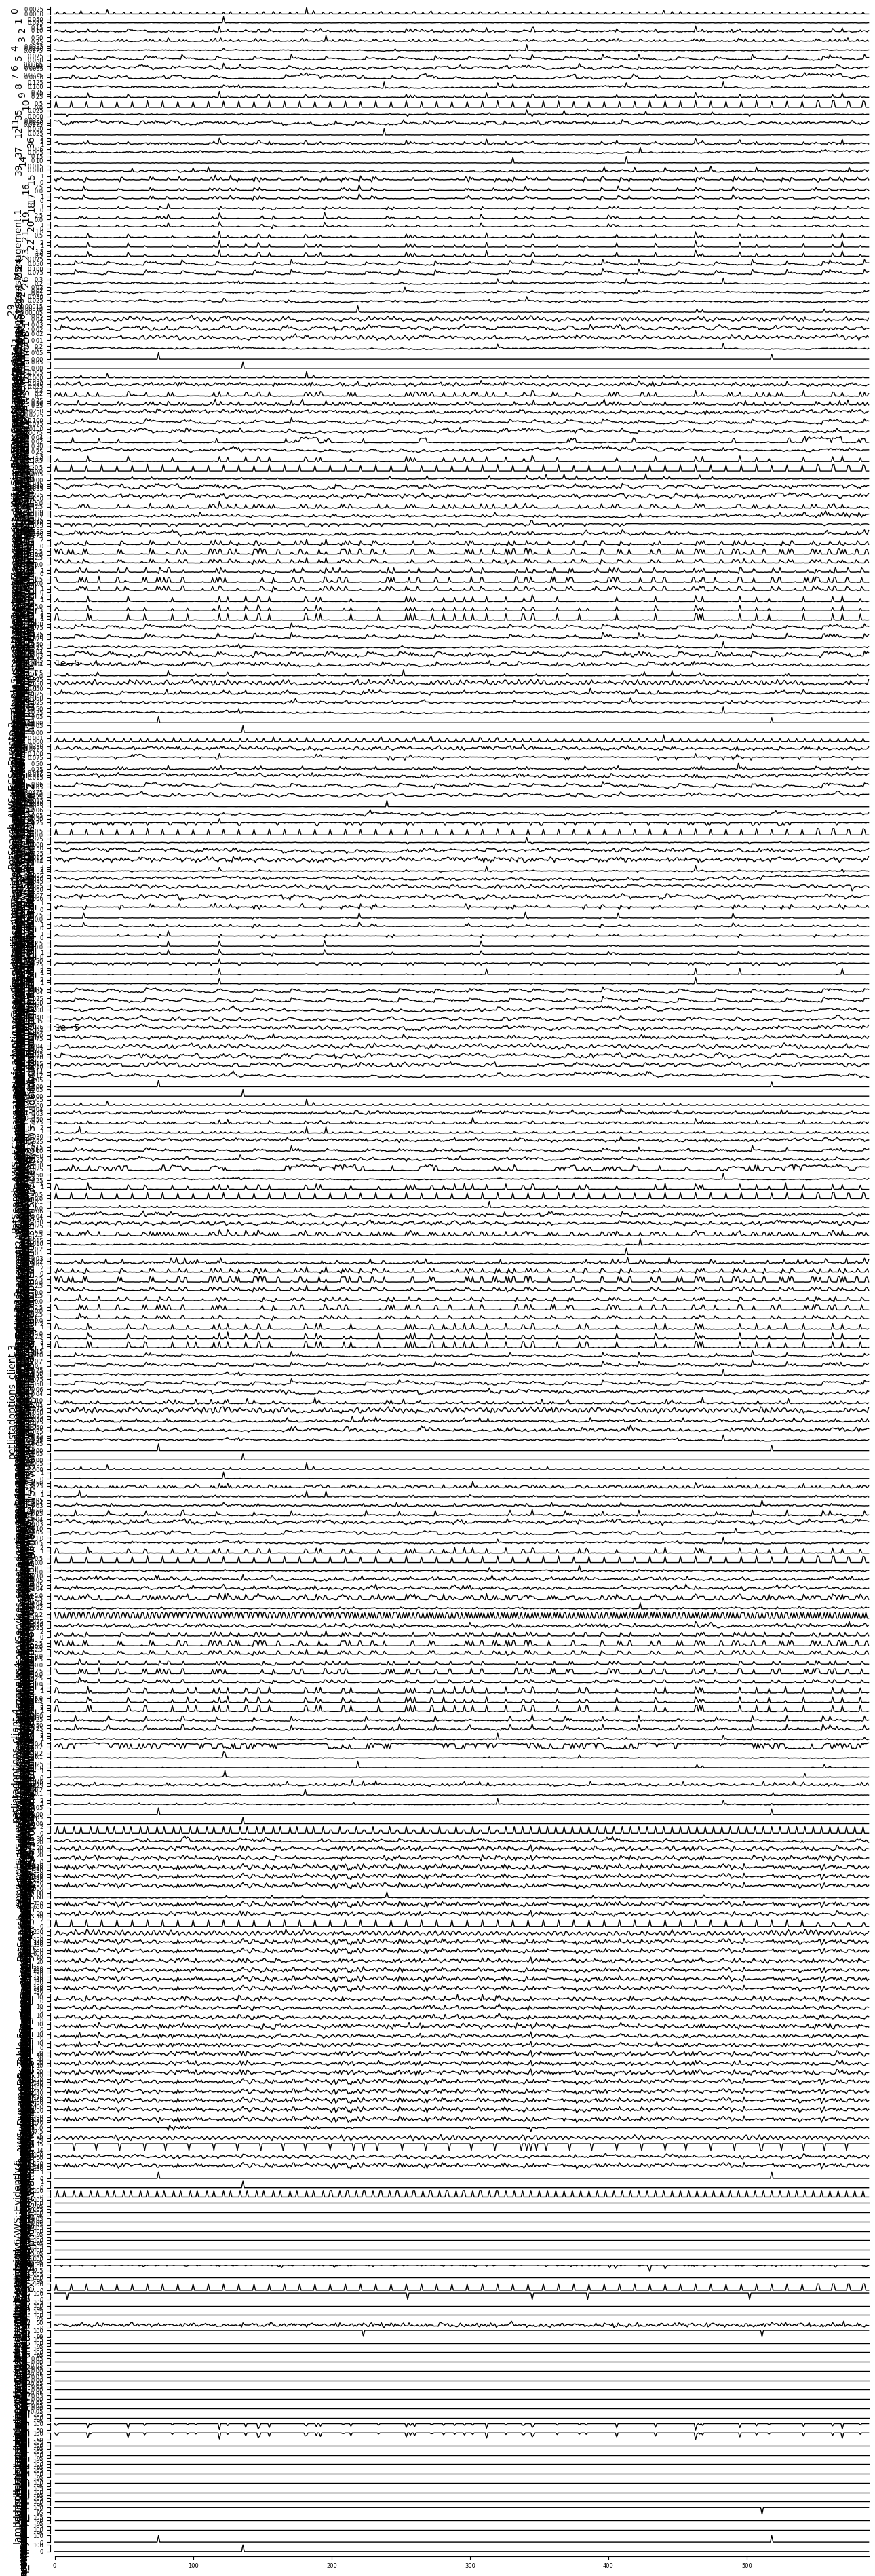

In [8]:
tp.plot_timeseries(dataframe_tigramite, figsize=(15, 50))
plt.show()

In [11]:
from tigramite.pcmci import PCMCI
from tigramite.independence_tests.parcorr import ParCorr

parcorr = ParCorr(significance='analytic')
pcmci = PCMCI(
    dataframe=dataframe_tigramite, 
    cond_ind_test=parcorr,
    verbosity=1)

In [12]:
correlations = pcmci.run_bivci(tau_max=10, val_only=True)['val_matrix']
lag_func_matrix = tp.plot_lagfuncs(val_matrix=correlations, 
                                   setup_args={'var_names':var_names, 'figsize':(15, 10),
                                    'x_base':5, 'y_base':.5})


##
## Running Tigramite BivCI algorithm
##

Parameters:

independence test = par_corr
tau_min = 0
tau_max = 10


c:\Users\t-ashutoshs\AppData\Local\Programs\Python\Python39\lib\site-packages\tigramite\independence_tests\parcorr.py:146: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  val, _ = stats.pearsonr(x_vals, y_vals)


In [1]:
import numpy as np
matrix_lags = np.argmax(np.abs(correlations), axis=2)
tp.plot_densityplots(dataframe=dataframe_tigramite, setup_args={'figsize':(15, 10)}, add_densityplot_args={'matrix_lags':matrix_lags}); plt.show()

NameError: name 'correlations' is not defined

In [ ]:
tau_max = 3
pc_alpha = 0.01
pcmci.verbosity = 2

results = pcmci.run_pcmciplus(tau_min=0, tau_max=tau_max, pc_alpha=pc_alpha)

In [ ]:
print("Graph")
print (results['graph'])
print("Adjacency MCI partial correlations")
print (results['val_matrix'].round(2))
print("Adjacency p-values")
print (results['p_matrix'].round(3))